# Questão do Livro 2.9

Reconsider the newspaper problem of Exercise 7, but now look at the news-paper’s business expenses. The current weekly business expenses for the paper are as follows: 
* USD 80,000 for the editorial department (news, features, editorials);
* USD 30,000 for the sales department (advertising);
* USD 30,000 for the circulation department; and
* USD 60,000 in fixed costs (mortgage, utilities, maintenance). 

The new management is considering cuts in the editorial department. It is estimated that the paper can operate with a minimum of a USD 40,000/week editorial budget. Reducing the editorial budget will save money, but it will also affect the quality of the paper. Experience in other markets suggests that
* the paper will lose 2% of its subscribers and 1% of its advertisers for every 10% cut in the editorial budget.

Management is also considering an increase in the sales budget. Recently the management of another paper in a similar market expanded its advertising sales budget by 20%. The result was a 15% increase in advertisements. The sales budget may be increased to as much as USD 50,000/week, but the over-all budget for business expenses will not be increased beyond the current level of USD 200,000/week.

## 2.9.a

Find the editorial and sales budget figures that maximize profit. Assume that the subscription price remains at USD 1.50/week, and the advertising price stays at USD 250/page. Use the five-step method, and model as a constrained optimization problem. Solve using the method of Lagrange multipliers.

In [1]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8.0, 6.0]

from sympy import solve, var, symbols, diff, N, simplify, Eq, lambdify
from sympy.plotting import plot, plot3d

In [2]:
# 1% of increase in editorial
d_e = var('d_e', real=True)
# 1% of increase in the sales budget
d_s = var('d_s', real=True)

q_a = 0#var('q_assinatura', real=True)
q_p = 0#var('q_publicidade', real=True)

# Number of (total) ------------------------------
# subscription/assinante
n_a_initial = 80000
n_a = n_a_initial - 5000*q_a - 1000*q_p
# the paper will lose 2% of its subscribers for every 10% cut in the editorial budget.
n_a = n_a * (1 + 0.002*d_e)

# advertising/publicidade
n_p = 350 - 50*q_p
# the paper will lose 1% of its advertisers for every 10% cut in the editorial budget.
# if expands sales budget by 20% (1%) then results in a 15% (0.75%) increase in advertisements
n_p = n_p * (1 + 0.001*d_e + 0.0075*d_s)

# Prices -----------------------------------------
p_a = 1.5 + 0.10*q_a
p_p = 250.0 + 100*q_p

# USD 80,000/week for the editorial department (news, features, editorials);
e = 80000 * (1 + 0.01*d_e)
# USD 30,000/week for the sales department (advertising);
s = 30000 * (1 + 0.01*d_s)
# USD 30,000/week for the circulation department (considering n_a_initial of subscriptions/assinantes)
c = 30000 * (n_a/n_a_initial)
# USD 60,000/week in fixed costs (mortgage, utilities, maintenance). 
f = 60000

R = n_a*p_a + n_p*p_p
C = e + s + c + f
L = R - C

L

-532.5*d_e + 356.25*d_s + 7500.0

In [3]:
C

860.0*d_e + 300.0*d_s + 200000

In [4]:
R

327.5*d_e + 656.25*d_s + 207500.0

In [5]:
e

800.0*d_e + 80000

In [6]:
s

300.0*d_s + 30000

In [7]:
print("Lucro normal")
L.subs({q_a: 0, q_p: 0, d_e:0, d_s: 0})

Lucro normal


7500.00000000000

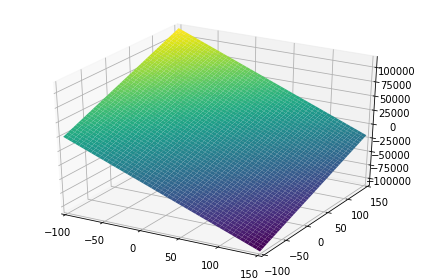

In [8]:
plot3d(L, (d_e, -100, 150), (d_s, -100, 150))

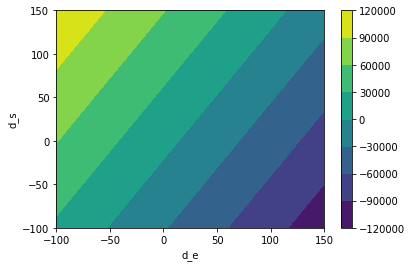

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def contour_plot(**kwargs):
    variables = list(kwargs.keys())
    if len(variables) != 2:
        raise Exception('Contour is for 2 dimentions')

    f = lambdify(variables, L, 'numpy')
    # PEP 0468: Python >= 3.6
    spaces = [np.linspace(*kwargs[e], 100) for e in variables]
    grid = np.meshgrid(*spaces)
    
    fig,ax=plt.subplots(1,1)
    
    c = plt.contourf(*grid, f(*grid))
    c.ax.set_xlabel(variables[0])
    c.ax.set_ylabel(variables[1])
    
    fig.colorbar(c)
    return c

contour_plot(d_e=(-100, 150), d_s=(-100, 150))

### Restrições

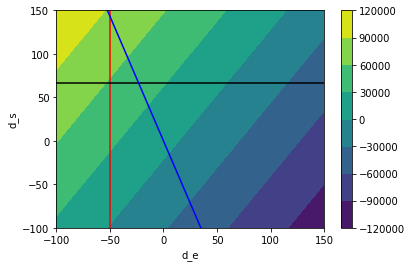

In [10]:
contour_plot(d_e=(-100, 150), d_s=(-100, 150))

def plot_numpy(f, variable, interval, color='red'):
    f_numpy = lambdify(variable, f, 'numpy')
    
    x = np.linspace(*interval, 10)
    y = np.linspace(*interval, 10)
    plt.plot(x, f_numpy(y), color=color)
    plt.ylim(*interval)
    plt.xlim(*interval)
    
def plot_numpy_x(f, variable, interval, color='red'):
    f_numpy = lambdify(variable, f, 'numpy')
    
    x = np.linspace(*interval, 10)
    y = np.linspace(*interval, 10)
    plt.plot([f_numpy(x)]*10, y, color=color)
    plt.ylim(*interval)
    plt.xlim(*interval)

def plot_numpy_y(f, variable, interval, color='red'):
    f_numpy = lambdify(variable, f, 'numpy')
    
    x = np.linspace(*interval, 10)
    y = np.linspace(*interval, 10)
    plt.plot(x, [f_numpy(y)]*10, color=color)
    plt.ylim(*interval)
    plt.xlim(*interval)

# It is estimated that the paper can operate with a minimum of a USD 40,000/week editorial budget.
restricao_1 = Eq(e, 40000)
d_e_minimo = solve(restricao_1)[0]
plot_numpy_x(d_e_minimo, d_e, (-100, 150), color='red')

# The sales budget may be increased to as much as USD 50,000/week
restricao_2 = Eq(s, 50000)
d_s_maximo = solve(restricao_2)[0]
plot_numpy_y(d_s_maximo, d_s, (-100, 150), color='black')

# but the over-all budget for business expenses will not be increased beyond the current level of USD 200,000/week
restricao_3 = Eq(C, 200000)
restricao_3
d_s_funcao_de_d_e = solve(restricao_3, d_s)[0]
d_s_funcao_de_d_e.subs({d_e: - 50})
plot_numpy(d_s_funcao_de_d_e, d_e, (-100, 150), color='blue')

### Otimização pelo ponto de encontro de retas

Vemos que a área válida é:

* **Restrição 1** Linha vermelha para a esquerda: Não pode dar mais de 50% de redução (despesa mínima de USD 40.000)
* **Restrição 2** Linha preta para baixo: Respeitar o limite máximo de despesa para marketing (USD 50.000)
* **Restrição 3** Linha azul para esquerda: O custo total dos lucros não pode passar USD 200.000

Fica claro no gráfico, que basta igualar as restrições da linha vermelha e da linha preta

In [11]:
solucao_otima = solve([restricao_1, restricao_2])
solucao_otima

{d_e: -50.0000000000000, d_s: 66.6666666666667}

In [12]:
L.subs(solucao_otima)

57875.0000000000

Caso a solução ótima fosse definido pelas restrições 1 e 3, o total de páginas de propaganda ficaria consideravelmente alto

In [13]:
solve([restricao_1, restricao_3]), n_p.subs(solve([restricao_1, restricao_3]))

({d_e: -50.0000000000000, d_s: 143.333333333333}, 708.750000000000)

### Otimização com restrição

In [14]:
mu_1 = symbols('mu_1', real = True)
mu_2 = symbols('mu_2', real = True)

lagrange = L - mu_1 * (e - 40000) - mu_2 * (s - 50000)
lagrange

-532.5*d_e + 356.25*d_s - mu_1*(800.0*d_e + 40000) - mu_2*(300.0*d_s - 20000) + 7500.0

In [15]:
grads = diff(lagrange, d_e), diff(lagrange, d_s), diff(lagrange, mu_1), diff(lagrange, mu_2)

In [16]:
for grad in grads:
    print(simplify(grad))

-800.0*mu_1 - 532.5
356.25 - 300.0*mu_2
-800.0*d_e - 40000
20000 - 300.0*d_s


In [17]:
solucao = solve(grads, [d_e, d_s, mu_1, mu_2], dict=True, frac=True)[0]
solucao

{d_e: -50.0000000000000,
 d_s: 66.6666666666667,
 mu_1: -0.665625000000000,
 mu_2: 1.18750000000000}

In [18]:
print("Lucro ótimo")
L.subs(solucao)

Lucro ótimo


57875.0000000000

In [19]:
n_a.subs({d_e: 0}), n_a.subs(solucao)

(80000, 72000.0000000000)

In [20]:
n_p.subs({d_s: 0, d_e: 0}), n_p.subs(solucao)

(350, 507.500000000000)

In [21]:
C.subs({d_e: 0, d_s: 0}), C.subs(solucao)

(200000, 177000.000000000)

In [22]:
R.subs({d_e: 0, d_s: 0}), R.subs(solucao)

(207500.000000000, 234875.000000000)

### L.2.9.d

Suppose that cuts in the editorial budget produce an unusually strong negative response in this market.  Assume that a 10\% cut in the editorial budget causes the paper to lose $p\%$ of its advertising and $2p\%$ of its subscribers. Determine the smallest value of $p$ for whichthe paper would be better off not to cut the editorial budget.

In [23]:
# 1% of increase in editorial
d_e = var('d_e', real=True)
# 1% of increase in the sales budget
d_s = var('d_s', real=True)

p = var('p', real=True)

q_a = 0#var('q_assinatura', real=True)
q_p = 0#var('q_publicidade', real=True)

# Number of (total) ------------------------------
# subscription/assinante
n_a_initial = 80000
n_a = n_a_initial - 5000*q_a - 1000*q_p
# the paper will lose 2% of its subscribers for every 10% cut in the editorial budget.
n_a = n_a * (1 + 0.02*p*d_e)

# advertising/publicidade
n_p = 350 - 50*q_p
# the paper will lose 1% of its advertisers for every 10% cut in the editorial budget.
# if expands sales budget by 20% (1%) then results in a 15% (0.75%) increase in advertisements
n_p = n_p * (1 + 0.01*p*d_e + 0.0075*d_s)

# Prices -----------------------------------------
p_a = 1.5 + 0.10*q_a
p_p = 250.0 + 100*q_p

# USD 80,000/week for the editorial department (news, features, editorials);
e = 80000 * (1 + 0.01*d_e)
# USD 30,000/week for the sales department (advertising);
s = 30000 * (1 + 0.01*d_s)
# USD 30,000/week for the circulation department (considering n_a_initial of subscriptions/assinantes)
c = 30000 * (n_a/n_a_initial)
# USD 60,000/week in fixed costs (mortgage, utilities, maintenance). 
f = 60000

R = n_a*p_a + n_p*p_p
C = e + s + c + f
L = R - C

L

2675.0*d_e*p - 800.0*d_e + 356.25*d_s + 7500.0

In [24]:
mu_1 = symbols('mu_1', real = True)
mu_2 = symbols('mu_2', real = True)
#mu_3 = symbols('mu_3', real = True)

lagrange = L - mu_1 * (e - 40000) - mu_2 * (s - 50000)# - mu_3 * (L - 7500)
lagrange

2675.0*d_e*p - 800.0*d_e + 356.25*d_s - mu_1*(800.0*d_e + 40000) - mu_2*(300.0*d_s - 20000) + 7500.0

In [25]:
print('Preservando o lucro mínimo de 7.500')
equacaod = Eq(lagrange.subs(solucao), 7500)
equacaod
#solve(Eq(lagrange.subs(solucao), 7500))

Preservando o lucro mínimo de 7.500


Eq(71250.0 - 133750.0*p, 7500)

In [26]:
solve(equacaod)

[0.476635514018692]

In [27]:
solve(equacaod)[0] == 51/107

True

In [28]:
solucaod = dict(solucao)
solucaod[p] = 0.1#0.476635514
lagrange.subs(solucaod)

57875.0000000000